In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("../data/bfi.csv")
df.columns
Index = np.array(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
        'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
        'O5', 'gender', 'education', 'age'], dtype ='object')
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)

In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# the p-value is 0

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model
# KMO is 0.84

0.8483267027192372

[5.13457985 2.75337527 2.14814212 1.85250623 1.54846254 1.11066151
 0.98067695 0.82430872 0.79516217 0.71828982 0.68602566 0.67614851
 0.65177562 0.62297416 0.59623084 0.56244599 0.54329886 0.51434031
 0.49437154 0.48263949 0.44865495 0.42280589 0.40028481 0.38773757
 0.38183723 0.2622634 ] [ 4.50017731  2.18349883  1.4830189   1.05684989  0.83232034  0.36970791
  0.1542588   0.10493567  0.04741526  0.01439144 -0.02935443 -0.03831679
 -0.07889403 -0.1039704  -0.11180683 -0.13651811 -0.14383986 -0.18373094
 -0.19515319 -0.20884231 -0.21891597 -0.24850979 -0.2615069  -0.27842521
 -0.29634358 -0.30851334]


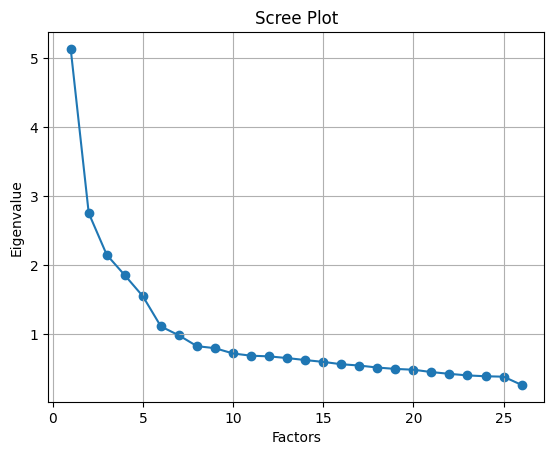

In [22]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev, v)

# You can create a scree plot using matplotlib
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
# Create factor analysis object and perform factor analysis with rotation
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df, 5)

# Retrieve factor loadings
loadings = fa.loadings_

# Print factor loadings
print("Factor Loadings:")
print(loadings)

# Get variance of each factor
variance = fa.get_factor_variance()

# Print variance explained by each factor
print("\nVariance Explained by Factors:")
print(variance)

Factor Loadings:
[[-0.05960934 -0.01601316  0.04276285]
 [-0.22784875  0.09997989 -0.00832484]
 [ 0.53638326  0.01117998  0.12820555]
 [ 0.63265503 -0.0126458   0.10214864]
 [ 0.40152121 -0.09928207  0.14015862]
 [ 0.63953326 -0.1390389   0.09277602]
 [ 0.08817428  0.02767786  0.59321239]
 [ 0.09428496  0.08771919  0.61450423]
 [ 0.08085105 -0.04402605  0.47636113]
 [-0.0674323   0.2369583  -0.62172554]
 [-0.14882021  0.30575982 -0.48086368]
 [-0.51222474  0.06276498  0.00447787]
 [-0.5812613   0.26569815 -0.11689062]
 [ 0.60766697  0.02986066  0.18602289]
 [ 0.67904503 -0.15935443  0.05000444]
 [ 0.46642442  0.03121694  0.36394735]
 [-0.05597244  0.74336775 -0.10827887]
 [-0.07284218  0.7405521  -0.06045931]
 [-0.03797263  0.74229002 -0.09153376]
 [-0.23725456  0.60885593 -0.1487111 ]
 [-0.06188283  0.51361576 -0.12675744]
 [ 0.2481042   0.0429863   0.3111074 ]
 [ 0.00698144  0.11028093 -0.29092206]
 [ 0.36315596  0.07021257  0.30642343]
 [-0.00881227  0.25896557  0.12188119]
 [-0.064